### Úloha 13.1

Načítajte dataset Wines z dvoch súborov a integrujte ho do jedného dátového rámca.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
wine_white = pd.read_csv('../data/winequality_white.csv')
wine_red = pd.read_csv('../data/winequality_red.csv')
all_wines = pd.concat([wine_white, wine_red], ignore_index= True, sort=False)
all_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Úloha 13.2

Predspracujte dátový rámec Wines vhodným spôsobom pre účely zhlukovania dát

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(all_wines)

all_wines_norm = pd.DataFrame(scaler.fit_transform(all_wines), index=all_wines.index, columns=all_wines.columns)

C:\Users\Marry\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Marry\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Úloha 13.3

Skúste vytvoriť zhlukovací model K-Means a nájdite najvhodnejší počet zhlukov pre model. 

In [18]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

K = range(1,15) 

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(all_wines_norm)
    Sum_of_squared_distances.append(km.inertia_)
    
print(Sum_of_squared_distances)

[893.7798808177989, 699.4916231708954, 568.0389718075594, 519.1238897317066, 479.74659802408195, 452.5012415625585, 429.50843017044616, 412.54454618762634, 396.8232523146692, 383.6958311271159, 371.3847214175298, 363.04475927337694, 354.7433189324154, 345.226241640234]


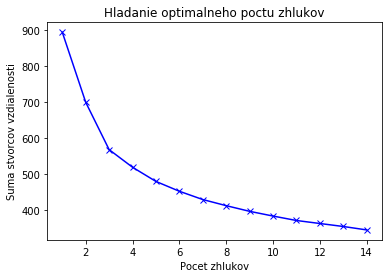

In [19]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Pocet zhlukov')
plt.ylabel('Suma stvorcov vzdialenosti')
plt.title('Hladanie optimalneho poctu zhlukov')
plt.show()

In [28]:
model = KMeans(n_clusters=7)
model.fit(all_wines_norm)

from sklearn.metrics.pairwise import euclidean_distances 

print("Inertia:")
print(model.inertia_)

Inertia:
429.6003958844425


### Úloha 13.4

Preskúmajte jednotlivé zhluky pre najlepší model - vypíšte centroidy a vypočítajte vájomné vzdialenosti. Pozrite sa na príklady priradené do jednotlivých zhlukov a skúste zhluky porovnať z hľadiska hodnôt jednotlivých atribútov.

In [45]:
import seaborn as sns
cluster_0 = np.where(model.labels_==0)
data_cluster_0 = all_wines.iloc[cluster_0]

cluster_1 = np.where(model.labels_==1)
data_cluster_1 = all_wines.iloc[cluster_1]

cluster_2 = np.where(model.labels_==2)
data_cluster_2 = all_wines.iloc[cluster_2]


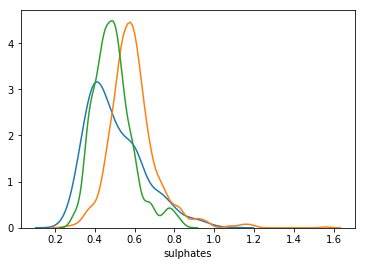

In [46]:
g = sns.distplot(data_cluster_0["sulphates"], hist= False)
g = sns.distplot(data_cluster_1["sulphates"], hist= False)
g = sns.distplot(data_cluster_2["sulphates"], hist= False)